# Lab 04

##### Import the needed libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Lets Read the dataset. The original file was in txt so I converted it into csv

In [2]:
df = pd.read_csv('liabins.csv')
df.head()

,Driving Citations,Vehicle Year,Driver Sex,Driver Age,Seat Belt Status,Law Knowledge,Employment Status,Year In State,Registered Vehicles,Years Education,Insurance Certificate Status,Insurance Status
0,0,70,1,29,3,1,1,4,2,12,1,1
1,0,79,2,24,2,1,2,17,1,10,2,1
2,0,87,1,50,2,1,2,0,1,12,1,1
3,0,92,1,64,2,2,2,37,1,12,1,1
4,0,87,2,18,2,1,1,9,0,11,1,1


##### Plot all the columns against "Vehicle Year" to find linear correlations

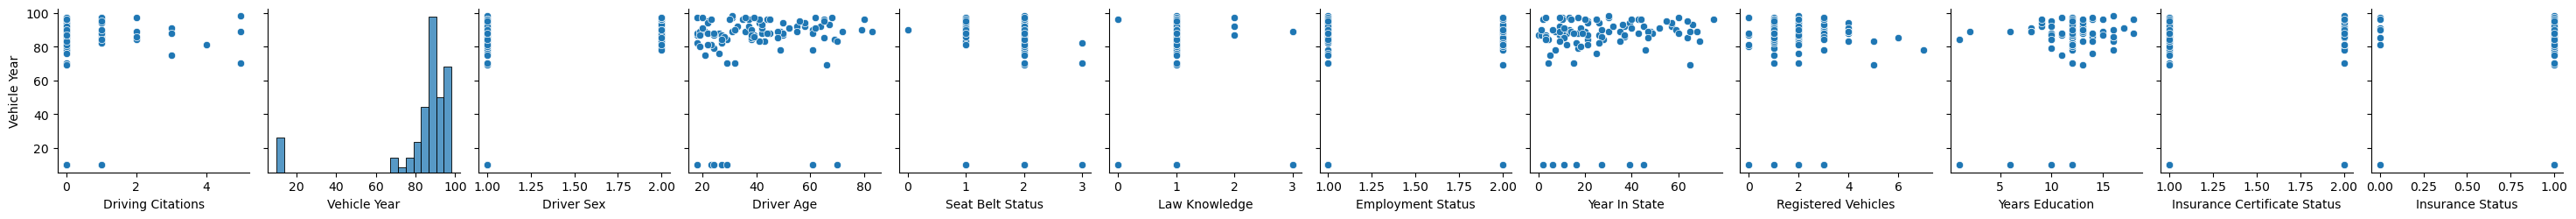

In [3]:
sns.pairplot(df,  y_vars='Vehicle Year')

##### There are not linear correlations but there are some values on "Vehicle Year" with quite low values

In [4]:
df[df['Vehicle Year'] < 50].head(10)

,Driving Citations,Vehicle Year,Driver Sex,Driver Age,Seat Belt Status,Law Knowledge,Employment Status,Year In State,Registered Vehicles,Years Education,Insurance Certificate Status,Insurance Status
17,0,10,1,23,2,0,1,11,2,12,2,1
30,1,10,1,27,1,1,1,2,1,10,2,0
52,0,10,1,24,2,1,1,6,0,1,1,1
59,0,10,1,18,2,1,1,16,3,12,1,1
73,0,10,1,29,2,1,1,27,2,12,1,1
84,0,10,1,61,2,1,1,39,3,12,1,1
93,1,10,1,70,3,3,2,45,3,6,2,1


##### I will replace this low values with the mean

Mean value: 83.18


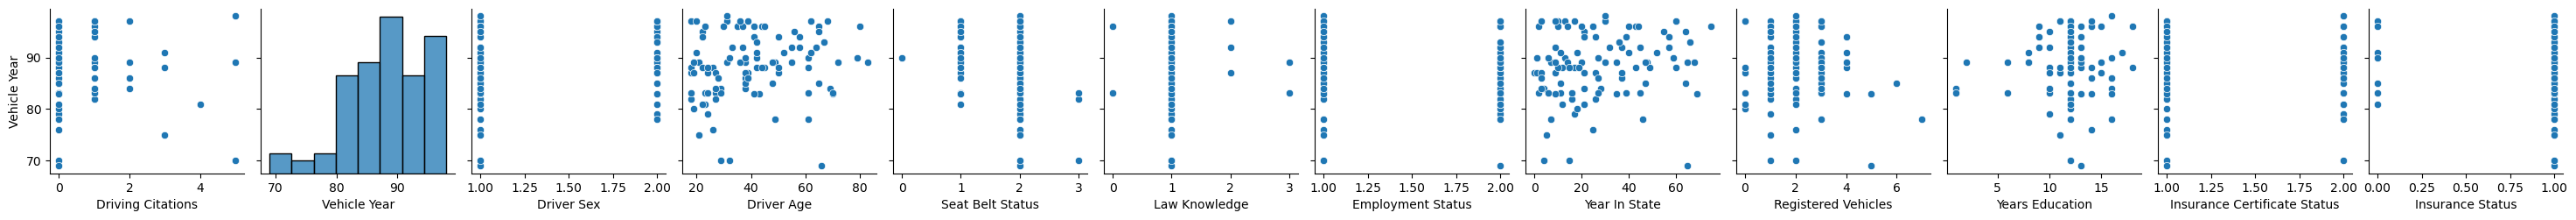

In [5]:
column_name = "Vehicle Year"
mean_value = df.loc[df[column_name] >= 10, column_name].mean()
print("Mean value:", mean_value)
df[column_name] = df[column_name].replace(to_replace=range(15), value=mean_value)
sns.pairplot(df,  y_vars=column_name)

##### Now we can see a better linear relation, not great ones but enough to work with, so the columns "Driver Age", "Year In State" and "Years Education" will be the independent variables

In [6]:
columns = df.columns
dep_var = df["Vehicle Year"]
indp_vars = df[["Driver Age", "Year In State", "Years Education"]]

##### Now we can train the and check the Linear Regresion model 

In [7]:
train_x, test_x, train_y, test_y = train_test_split(indp_vars, dep_var, test_size=0.2, random_state=30)

mlr_model = LinearRegression()
mlr_model.fit(train_x, train_y)
pred = mlr_model.predict(test_x)
mse = mean_squared_error(test_y, pred)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(test_y, pred)
print("R2:", r2)

MSE:  42.908168600064535
RMSE: 6.55043270326965
R2: 0.03609075187289024


##### Lets see if we can improve this using the lasso model instead

In [8]:
lasso_model = Lasso().fit(train_x, train_y)
lasso_pred = lasso_model.predict(test_x)
lasso_mse = mean_squared_error(test_y, lasso_pred)
print('Lasso MSE: ', lasso_mse)
lasso_rmse = np.sqrt(lasso_mse)
print("Lasso RMSE:", lasso_rmse)
lasso_r2 = r2_score(test_y, lasso_pred)
print("Lasso R2:", lasso_r2)

Lasso MSE:  43.53589934166168
Lasso RMSE: 6.598173939936843
Lasso R2: 0.02198911372564305


##### Lasso is not giving us better results, lets try with Decision Tree algorithm

In [9]:
dtr_model = DecisionTreeRegressor().fit(train_x, train_y)
dtr_pred = dtr_model.predict(test_x)
dtr_mse = mean_squared_error(test_y, dtr_pred)
print('Decision Tree MSE: ', dtr_mse)
dtr_rmse = np.sqrt(dtr_mse)
print("Decision Tree RMSE:", dtr_rmse)
dtr_r2 = r2_score(test_y, dtr_pred)
print("Decision Tree R2:", dtr_r2)

Decision Tree MSE:  181.67497999999998
Decision Tree RMSE: 13.478686137750962
Decision Tree R2: -3.0812320611382216


##### Not better as well, lets give a try to Random Forest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor().fit(train_x, train_y)
forest_pred = forest_model.predict(test_x)
forest_mse = mean_squared_error(test_y, forest_pred)
print("Forest MSE:", forest_mse)
rmse = np.sqrt(forest_mse)
print("Forest RMSE:", rmse)
forest_r2 = r2_score(test_y, forest_pred)
print("Forest R2:",forest_r2)

Forest MSE: 76.65010172361109
Forest RMSE: 8.755004381701422
Forest R2: -0.7219038782550447


##### Conclusion: To predict the "Vehicle Year" the **Muti Linear Regresion Model** is the best model